In [198]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import gym
import random
from gym import Env, spaces

In [247]:
a = np.random.random()
a

0.6988891862890294

In [116]:
P = np.array([[0.6, 0.4], [0.4, 0.6]])
P

array([[0.6, 0.4],
       [0.4, 0.6]])

In [182]:
S = np.array([0, 1])
state = 0

In [197]:
if state == 0:
    state = np.random.choice(S, p = P[0])
else:
    state = np.random.choice(S, p = P[1])

return state

1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


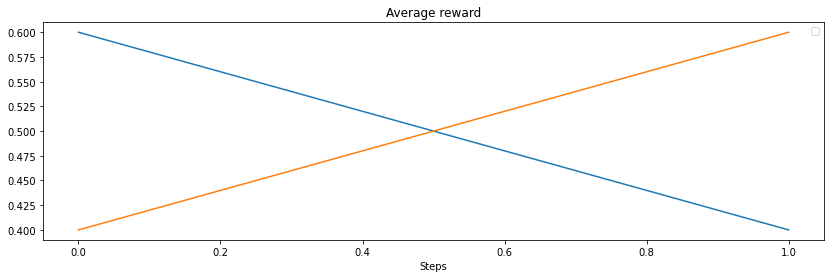

In [217]:
plt.figure(figsize=(14, 4))
plt.plot(P)
plt.title("Average reward")
plt.xlabel("Steps")
plt.legend()

In [218]:
def get_regret(env, agent, n_steps=10000, n_trials=10):
    score = np.zeros(n_steps)
    optimal_r = env.optimal_reward()

    for trial in range(n_trials):
        agent.reset()
        for t in range(n_steps):
            action = agent.get_action()
            reward = env.pull(action)
            agent.update(action, reward)
            score[t] += optimal_r - reward
    score = score / n_trials
    score = np.cumsum(score)
    return score

In [219]:
def plot_regret(agents, scores):
    for k,v in agents.items():
        plt.plot(scores[k])
    plt.legend([k for k,v in agents.items()])
    plt.ylabel("regret")
    plt.xlabel("steps")
    plt.show()

In [220]:
n_actions = 5
epsilon = 0.01

agents = {
    #"Random" : RandomAgent(n_actions), 
    "EpsilonGreedy(eps=0.01)" : EGreedyAgent(n_actions, epsilon),
    "UCB": UCBAgent(n_actions),
    "Thompson": ThompsonAgent(n_actions) }

env = Bandit(n_actions)
scores = {}

for name, agent in agents.items():
    score = get_regret(env, agent)
    scores[name] = score

plot_regret(agents, scores)

NameError: name 'EGreedyAgent' is not defined

NameError: name 'runs' is not defined

<Figure size 1008x288 with 0 Axes>

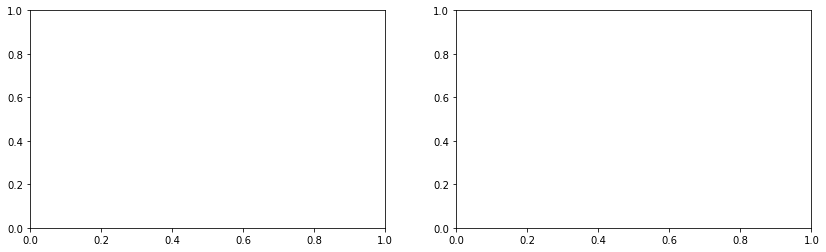

In [221]:
steps = 1000
average_rewards = np.zeros(steps)
optimal_actions = np.zeros(steps)

plt.figure(figsize=(14, 4))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14, 4)
for eps in [0, 0.01, 0.1]:
    for run in range(runs):
        # Get new bandit problem and run the selection method
        bandit = KBandit(k)    
        results = solve_bandit(bandit, eps, steps)

        # Accumulate rewards and optimal action counts
        average_rewards += results[:, 1]
        optimal_idx = results[:, 0] == bandit.optimal_action
        optimal_actions[optimal_idx] += 1

    # Finalize averages
    average_rewards /= runs
    optimal_actions /= runs

    ax1.plot(average_rewards, label=r"$\epsilon$={:.2f}".format(eps))
    ax2.plot(optimal_actions, label=r"$\epsilon$={:.2f}".format(eps))

ax1.set_title("Average reward")
ax1.set_xlabel("Steps")
ax1.legend()
ax2.set_title("Optimal action fraction")
ax2.set_xlabel("Steps")
ax2.legend();

In [ ]:
class RLAgent:
    def __init__(self, n_actions=5, epsilon):
        self.epsilon = epsilon
        self.avg_reward = np.zeros((n_actions, 2))
        self.total_pulls = 0
        self.n_actions = n_actions
        
    def reset(self):
        self.avg_reward = np.zeros(n_actions)
        self.failure_cnt = np.zeros(n_actions)
        self.total_pulls = 0        
        
    def get_action(self):
        estimates = 0
        if np.random.random() < self.epsilon:
            return np.random.randint(0, self.n_actions)
        else:
            return np.argmax(estimates)
    
    def update(self, action, reward):
        self.total_pulls += 1
        self.avg_reward[action][1] += 1
        self.avg_reward[action][0] = (self.avg_reward + reward)/self.avg_reward[action][1]